In [1]:
#My imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
#read in the data
df = pd.read_csv('257k-gaiadr2-sources-with-photometry.csv')

In [3]:
#Drop irrelevant columns
X = df.drop(columns=["phot_g_mean_mag", "tycho2_id", "source_id"])

In [4]:
#Prediction vector
y = df['phot_g_mean_mag']

In [5]:
#Splitting data into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [10]:
#Instantiate our Decision tree regression model, with an integer random state (we want same results every time)
Dtr = DecisionTreeRegressor(random_state = 0)

In [11]:
#once again we will only use fit, as Dtr uses its on decision functions, and our data is pretty symmetrical
Dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [12]:
y_pred_test = Dtr.predict(X_test)
y_pred_train = Dtr.predict(X_train)

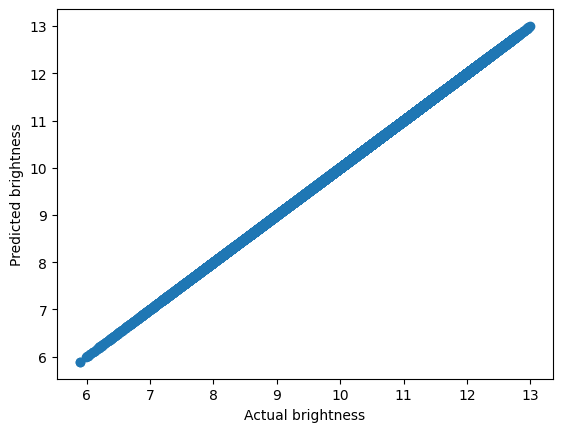

In [13]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

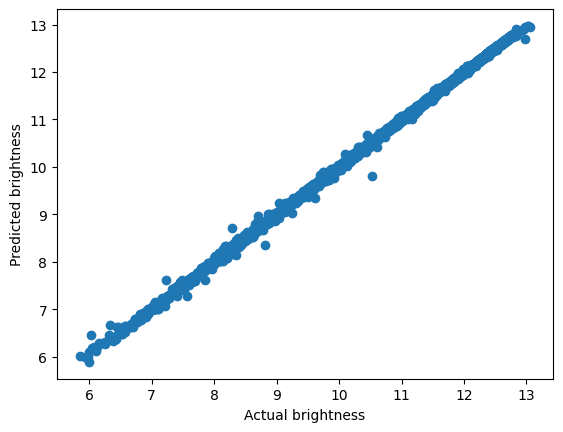

In [14]:
#Graph prediction
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual brightness")
plt.ylabel("Predicted brightness")
plt.show()

In [19]:
#loss functions. We actually get the lowest loss out of all models so far
MSE = mean_squared_error(y_test, y_pred_test)
MAE = mean_absolute_error(y_test, y_pred_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred_test)
MAPE

0.0004955761757413668

In [20]:
#Applied science part. Our null hypothesis is that the observed and expected frequencies have NO SIGNIFICANT DIFFERENCE
#Pearson's correlation test
r2_score(y_test, y_pred_test)
#The high correlation means the prediction and the actual frequencies are similar, which is what we want. Hence we accept the null hypothesis
#This is the highest R score we currently have, and is so close to 1. This means this model works very well in prediction

0.9998803801656976

In [21]:
#The F test
F = (np.var(y_pred_test))/(np.var(y_test))
F
#Our F value is less than 1 and that of 32 DoF, with apha = 0.05. Once again, this means we can accept our null hypothesis

0.9996579257082148